# 实验四
## IIR数字滤波器设计及软件实现
### 1．实验目的
- （1）熟悉用双线性变换法设计IIR数字滤波器的原理与方法；
- （2）学会调用MATLAB信号处理工具箱中滤波器设计函数（或滤波器设计分析工具fdatool）设计各种IIR数字滤波器，学会根据滤波需求确定滤波器指标参数。
- （3）掌握IIR数字滤波器的MATLAB实现方法。
- （4）通过观察滤波器输入输出信号的时域波形及其频谱，建立数字滤波的概念。

### 2．实验原理
&emsp;&emsp;设计IIR数字滤波器一般采用间接法（脉冲响应不变法和双线性变换法），应用最广泛的是双线性变换法。基本设计过程是：①先将给定的数字滤波器的指标转换成过渡模拟滤波器的指标； ②设计过渡模拟滤波器；③将过渡模拟滤波器系统函数转换成数字滤波器的系统函数。MATLAB信号处理工具箱中的各种IIR数字滤波器设计函数都是采用双线性变换法。

&emsp;&emsp;第六章介绍的滤波器设计函数butter、cheby1 、cheby2 和ellip可以分别被调用来直接设计巴特沃斯、切比雪夫1、切比雪夫2和椭圆模拟和数字滤波器。本实验要求读者调用如上函数直接设计IIR数字滤波器。
本实验的数字滤波器的MATLAB实现是指调用MATLAB信号处理工具箱函数filter对给定的输入信号x(n)进行滤波，得到滤波后的输出信号y(n）。

### 3. 实验内容及步骤
- （1）调用信号产生函数mstg产生由三路抑制载波调幅信号相加构成的复合信号st，该函数还会自动绘图显示st的时域波形和幅频特性曲线，如图10.4.1所示。由图可见，三路信号时域混叠无法在时域分离。但频域是分离的，所以可以通过滤波的方法在频域分离，这就是本实验的目的。

- （2）要求将st中三路调幅信号分离，通过观察st的幅频特性曲线，分别确定可以分离st中三路抑制载波单频调幅信号的三个滤波器（低通滤波器、带通滤波器、高通滤波器）的通带截止频率和阻带截止频率。要求滤波器的通带最大衰减为0.1dB,阻带最小衰减为60dB。
$$
s(t)=cos(2\pi f_0 t)cos(2\pi f_c t)=\frac{1}{2}[cos(2\pi (f_c-f_0)t)+cos(2\pi (f_c+f_0)t)]
$$
&emsp;&emsp;其中，$cos(2\pi f_c t)$称为载波，$f_c$为载波频率，$cos(2\pi f_0 t)$称为单频调制信号，$f_0$为调制正弦波信号频率，且满足$f_c>f_0$。由上式可见，所谓抑制载波单频调幅信号，就是2个正弦信号相乘，它有2个频率成分：和频$f_c+f_0$和差频$f_c-f_0$，这2个频率成分关于载波频率$f_c$对称。所以，1路抑制载波单频调幅信号的频谱图是关于载波频率$f_c$对称的2根谱线，其中没有载频成分，故取名为抑制载波单频调幅信号。容易看出，图10.4.1中三路调幅信号的载波频率分别为250Hz、500Hz、1000Hz。如果调制信号m(t)具有带限连续频谱，无直流成分，则$s(t)=m(t)cos(2\pi f_c t)$就是一般的抑制载波调幅信号。其频谱图是关于载波频率fc对称的2个边带（上下边带），在专业课通信原理中称为双边带抑制载波 (DSB-SC) 调幅信号,简称双边带 (DSB) 信号。如果调制信号$m(t)$有直流成分，则$s(t)=m(t)cos(2\pi f_c t)$就是一般的双边带调幅信号。其频谱图是关于载波频率$f_c$对称的2个边带（上下边带），并包含载频成分。

- （3）编程序调用MATLAB滤波器设计函数ellipord和ellip分别设计这三个椭圆滤波器，并绘图显示其幅频响应特性曲线。 

- （4）调用滤波器实现函数filter，用三个滤波器分别对信号产生函数mstg产生的信号st进行滤波，分离出st中的三路不同载波频率的调幅信号$y_1(n)、y_2(n)和y_3(n)$， 并绘图显示$y_1(n)、y_2(n)和y_3(n)$的时域波形，观察分离效果。

### 4.实验程序框图

![mstg](mstg.jpg)

### 5.思考题
- （1）请阅读信号产生函数mstg，确定三路调幅信号的载波频率和调制信号频率。
- （2）信号产生函数mstg中采样点数N=800，对st进行N点FFT可以得到6根理想谱线。如果取N=1000，可否得到6根理想谱线？为什么？N=2000呢？请改变函数mstg中采样点数N的值，观察频谱图验证您的判断是否正确。
- （3）修改信号产生函数mstg，给每路调幅信号加入载波成分，产生调幅（AM）信号，重复本实验，观察AM信号与抑制载波调幅信号的时域波形及其频谱的差别。

提示：AM信号表示式：$$s(t)=[1+cos(2\pi f_0 t)]cos(2\pi f_c t)$$。

&emsp;&emsp;答：
（3）因为信号st是周期序列，谱分析时要求观察时间为整数倍周期。所以，本题的一般解答方法是，先确定信号st的周期，在判断所给采样点数N对应的观察时间Tp=NT是否为st的整数个周期。但信号产生函数mstg产生的信号st共有6个频率成分，求其周期比较麻烦，故采用下面的方法解答。：
- 分析发现，st的每个频率成分都是25Hz的整数倍。采样频率Fs=10kHz=25×400Hz，即在25Hz的正弦波的1个周期中采样400点。所以，当N为400的整数倍时一定为st的整数个周期。因此，采样点数N=800和N=2000时，对st进行N点FFT可以得到6根理想谱线。如果取N=1000，不是400的整数倍，不能得到6根理想谱线。

### 6.实验源码

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as signal

In [2]:
#解决作图时中文无法显示的问题
import matplotlib.pyplot as plt
plt.rc('font', family='SimHei', size=14)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
def mstg():
    #产生信号序列向量st,并显示st的时域波形和频谱
    #st=mstg 返回三路调幅信号相加形成的混合信号,长度N=1600
    #N为信号st的长度
    N=800
    #采样频率Fs=10 kHz, Tp为采样时间
    Fs=10000
    T=1/Fs
    Tp=N*T
    
    t=np.arange(0,N*T,T)
    k=np.arange(0,N)
    f=k/Tp
    
    #第1路调幅信号的载波频率fc1=1000 Hz
    fc1=Fs/10
    #第1路调幅信号的调制信号频率fm1=100 Hz
    fm1=fc1/10
    
    #第2路调幅信号的载波频率fc2=500 Hz
    fc2=Fs/20
    #第2路调幅信号的调制信号频率fm2=50 Hz
    fm2=fc2/10
    
    #第3路调幅信号的载波频率fc3=250 Hz
    fc3=Fs/40
    #第3路调幅信号的调制信号频率fm3=25 Hz
    fm3=fc3/10
    
    #产生第1路调幅信号
    xt1=np.cos(2*np.pi*fm1*t)*np.cos(2*np.pi*fc1*t)
    #产生第2路调幅信号
    xt2=np.cos(2*np.pi*fm2*t)*np.cos(2*np.pi*fc2*t)
    #产生第3路调幅信号
    xt3=np.cos(2*np.pi*fm3*t)*np.cos(2*np.pi*fc3*t)
    
    #三路调幅信号相加
    st=xt1+xt2+xt3
    #计算信号st的频谱
    fxt=np.fft.fft(st,N)

    #以下为绘图部分，绘制st的时域波形和幅频特性曲线

    '''    
    fig,axxr=plt.subplots(3,1,figsize=(14,16))
    axxr[0].plot(t,st)
    axxr[0].set_title("(a) s(t)的波形")
    axxr[0].set_xlabel("t/s")
    axxr[0].set_ylabel("s(t)")
    axxr[1].stem(f,abs(fxt)/np.max(abs(fxt)),'--')
    axxr[1].set_title("(b) s(t)的频谱")
    axxr[1].set_xlabel("f/Hz")
    axxr[1].set_ylabel("幅度")
    '''

    return st

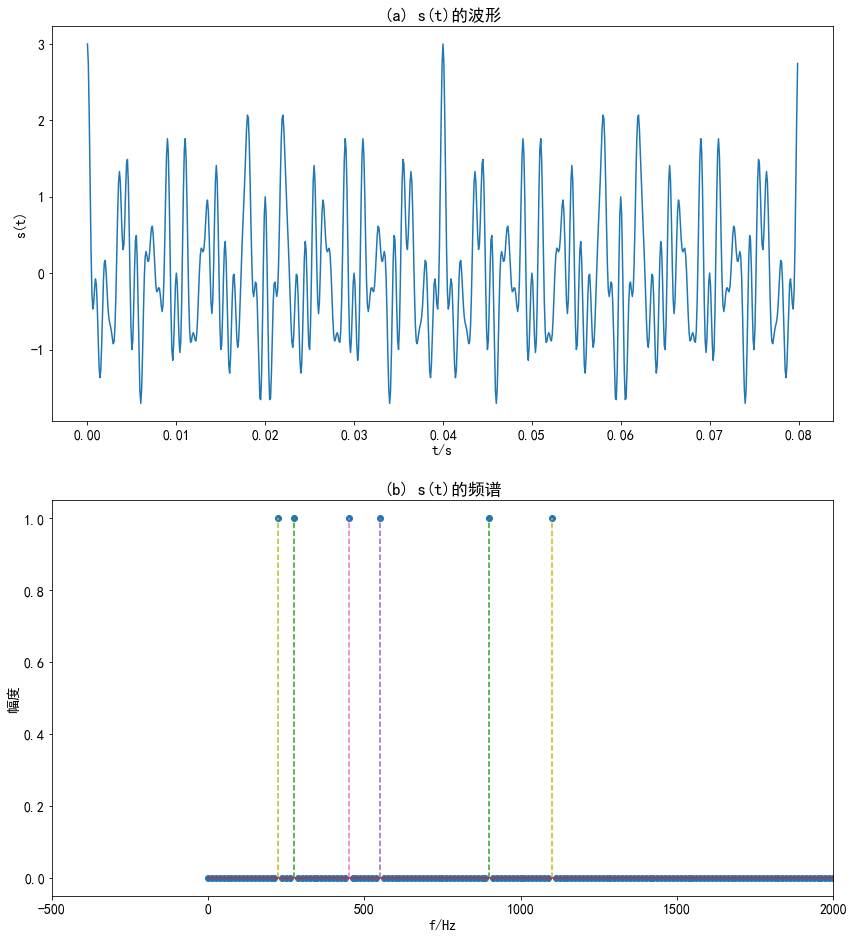

In [4]:
def mstg1():
    #产生信号序列向量st,并显示st的时域波形和频谱
    #st=mstg 返回三路调幅信号相加形成的混合信号,长度N=1600
    #N为信号st的长度
    N=800
    #采样频率Fs=10 kHz, Tp为采样时间
    Fs=10000
    T=1/Fs
    Tp=N*T
    
    t=np.arange(0,N*T,T)
    k=np.arange(0,N)
    f=k/Tp
    
    #第1路调幅信号的载波频率fc1=1000 Hz
    fc1=Fs/10
    #第1路调幅信号的调制信号频率fm1=100 Hz
    fm1=fc1/10
    
    #第2路调幅信号的载波频率fc2=500 Hz
    fc2=Fs/20
    #第2路调幅信号的调制信号频率fm2=50 Hz
    fm2=fc2/10
    
    #第3路调幅信号的载波频率fc3=250 Hz
    fc3=Fs/40
    #第3路调幅信号的调制信号频率fm3=25 Hz
    fm3=fc3/10
    
    #产生第1路调幅信号
    xt1=np.cos(2*np.pi*fm1*t)*np.cos(2*np.pi*fc1*t)
    #产生第2路调幅信号
    xt2=np.cos(2*np.pi*fm2*t)*np.cos(2*np.pi*fc2*t)
    #产生第3路调幅信号
    xt3=np.cos(2*np.pi*fm3*t)*np.cos(2*np.pi*fc3*t)

    #三路调幅信号相加
    st=xt1+xt2+xt3
    #计算信号st的频谱
    fxt=np.fft.fft(st,N)

    #以下为绘图部分，绘制st的时域波形和幅频特性曲线
   
    fig,axxr=plt.subplots(2,1,figsize=(14,16))
    axxr[0].plot(t,st)
    axxr[0].set_title("(a) s(t)的波形")
    axxr[0].set_xlabel("t/s")
    axxr[0].set_ylabel("s(t)")
    axxr[1].stem(f,abs(fxt)/np.max(abs(fxt)),'--')
    axxr[1].set_title("(b) s(t)的频谱")
    axxr[1].set_xlim(xmax=2000)
    axxr[1].set_xlabel("f/Hz")
    axxr[1].set_ylabel("幅度")
    
    #return st
mstg1()

In [5]:
#时域离散系统损耗函数绘图
def myplot(B,A):
    #B为系统函数分子多项式系数向量
    #A为系统函数分母多项式系数向量
    #计算数字滤波器的频率响应
    [W,H]=signal.freqz(B,A,1000)        #数字滤波器的频率响应
    plt.plot(W,20*np.log10(abs(H)))
    plt.grid(True)
    plt.xlabel("\omega/\pi")
    plt.ylabel('幅度(dB)')
    plt.title('损耗函数曲线')

In [6]:
#时域序列连续曲线绘图函数
def tplot(xn,T,yn):
    #xn：信号数据序列，yn：绘图信号的纵坐标名字(字符串)
    #T为采样间隔
    n=np.arange(len(xn))
    t=n*T
    plt.plot(t,xn)
    plt.xlabel("t/s")
    plt.ylabel(yn)
    #plt.title("滤波后的时域波形")

In [7]:
#IIR数字滤波器设计及软件实现
#采样频率
Fs=10000
T=1/Fs
#调用信号产生函数mstg产生由三路抑制载波调幅信号相加构成的复合信号st 
st=mstg()

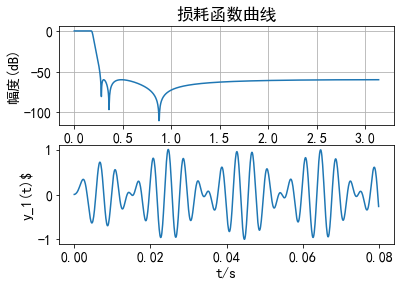

In [8]:
#低通滤波器设计与实现=========================
#DF指标（低通滤波器的通、 阻带边界频率）
fp=280
fs=450;
wp=2*fp/Fs
ws=2*fs/Fs
rp=0.1
rs=60;    
#调用ellipord计算椭圆DF阶数N和通带截止频率wp
[N,wp]=signal.ellipord(wp,ws,rp,rs);      
#调用ellip计算椭圆带通DF系统函数系数向量B和A
[B,A]=signal.ellip(N,rp,rs,wp);  
#低通滤波器设计与实现绘图部分
#调用绘图函数myplot绘制损耗函数曲线
plt.subplot(2,1,1);
myplot(B,A);
#滤波器软件实现
y1t=signal.lfilter(B,A,st);    
#调用绘图函数tplot绘制滤波器输出波形
yt=r'y_1(t)$';
plt.subplot(2,1,2);
tplot(y1t,T,yt);  

In [9]:
#带通滤波器设计与实现=========================
fpl=440;
fpu=560;
fsl=275;
fsu=900;
wp=[2*fpl/Fs,2*fpu/Fs]; 
ws=[2*fsl/Fs,2*fsu/Fs];
rp=0.1;
rs=60; 
#调用ellipord计算椭圆DF阶数N和通带截止频率wp
[N,wp]=signal.ellipord(wp,ws,rp,rs);
#调用ellip计算椭圆带通DF系统函数系数向量B和A
#[B,A]=signal.ellip(N,rp,rs,wp); 
[B,A]=signal.ellip(N,rp,rs,wp,'bandpass');
#滤波器软件实现
y2t=signal.lfilter(B,A,st);     

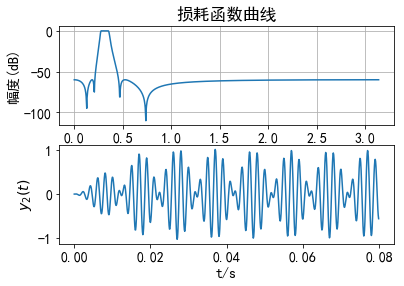

In [10]:
#带通滤波器设计与实现绘图部分
#调用绘图函数myplot绘制损耗函数曲线
plt.subplot(2,1,1);
myplot(B,A);
#调用绘图函数tplot绘制滤波器输出波形
yt=r'$y_2(t)$';
plt.subplot(2,1,2);
tplot(y2t,T,yt);      

In [11]:
#高通滤波器设计与实现===========================
fp=890;
fs=600;
wp=2*fp/Fs; 
ws=2*fs/Fs;
rp=0.1;
rs=60;    
#DF指标（低通滤波器的通、 阻带边界频率）
#调用ellipord计算椭圆DF阶数N和通带%截止频率wp
[N,wp]=signal.ellipord(wp,ws,rp,rs);     
#调用ellip计算椭圆带通DF系统函数系数向量B和A
[B,A]=signal.ellip(N,rp,rs,wp,'high');  
#滤波器软件实现
y3t=signal.lfilter(B,A,st); 

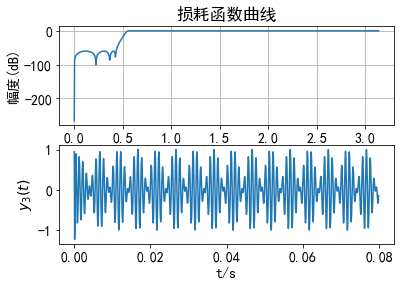

In [12]:
#高低通滤波器设计与实现绘图部分
#调用绘图函数myplot绘制损耗函数曲线
plt.subplot(2,1,1);
myplot(B,A);
#调用绘图函数tplot绘制滤波器输出波形
yt=r'$y_3(t)$';
plt.subplot(2,1,2);
tplot(y3t,T,yt);    